In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


in tiis dataset we have 614 rowsand 13 coiumns which are object and continuous data type and one is ourtarget or dependent 
variablesand others are independent variables

In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
# here we check the loan id is nominal or identifier data so we remove this columns
data.drop('Loan_ID',axis=1,inplace=True)

In [8]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

here we see object and float bothh data type is avilable in data set hence we traet with appropriate method

In [6]:
for i in data.columns:
    print(data[i].value_counts)
    print(data[i].nunique())
    print('\n')

<bound method IndexOpsMixin.value_counts of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
614


<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
2


<bound method IndexOpsMixin.value_counts of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
2


<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>
4


<bound method IndexOpsMixin.value_counts of 0          Graduate
1      

In [9]:
#here we see that the dpendent columns all values present is in numeric form but its showing object data type so we can change 

In [4]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [5]:
data['Dependents'].replace({'3+':3},inplace=True)

In [6]:
data['Dependents']=data['Dependents'].astype('float')
data['Dependents'].dtypes

dtype('float64')

In [7]:
# checking the nulls value of dataset
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there is lot of null values lets fill with approx values by using method

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# lets fill nullvlues with using fillna method

data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mean())
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].mean())


In [9]:
#again checking nulls
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

numerical columns: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [25]:
# lets checking the statistics of data
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.002718,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


description given below of this dataset

1) ther is no nulls valuespresent in dataset and no missing values
2) in some columns the maximum values is too high as compared to 50 and 75 percentile hence possibility to outliers present
3) the mean values is lower than standerd deviation hence there is outliers present and also check skewness od data
4) wealso notice the 25 min 75% and median values of data which is good in condition so do not much worry about this

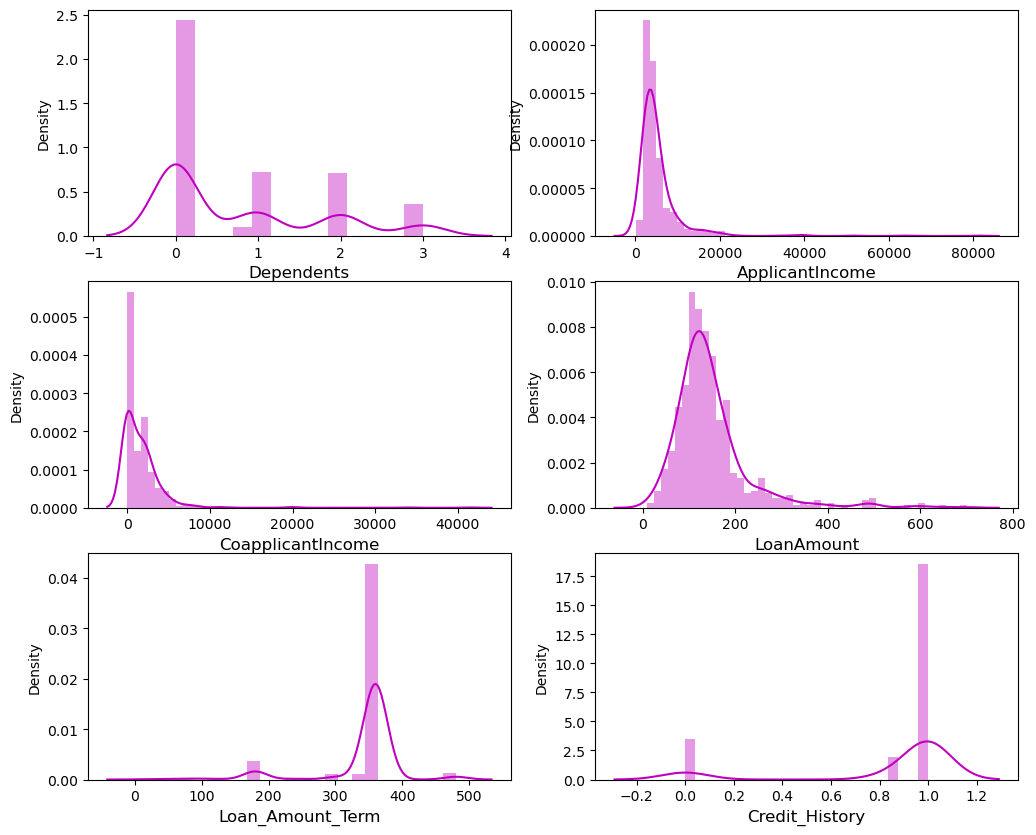

In [32]:
# lets checking distribution od data
plt.figure(figsize=(12,10), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [11]:
# there are few more columns are skewed hence removing skewness of dataset
data.skew()

Dependents           0.990764
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [12]:
#apply cube root method to remove skewness in dataset
data['Dependents']= np.cbrt(data['Dependents'])
data['ApplicantIncome']= np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome']= np.cbrt(data['CoapplicantIncome'])
data['LoanAmount']= np.cbrt(data['LoanAmount'])
data['Loan_Amount_Term']= np.cbrt(data['Loan_Amount_Term'])


In [13]:
# again check skewness
data.skew()

Dependents           0.367524
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -1.963600
dtype: float64

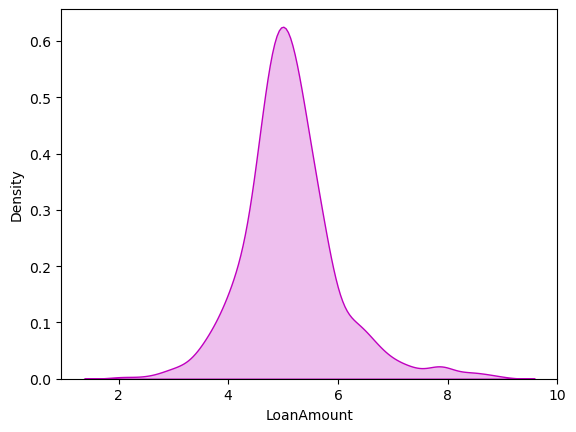

In [44]:
sns.distplot(data['LoanAmount'], color='m',hist=False,kde_kws= {'shade':True})
plt.show()

In [15]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

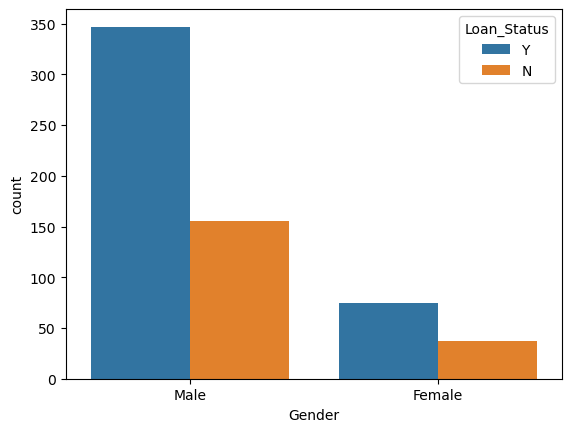

In [16]:
#checking the visiualization of features
sns.countplot(x='Gender',hue='Loan_Status',data=data)
plt.show()

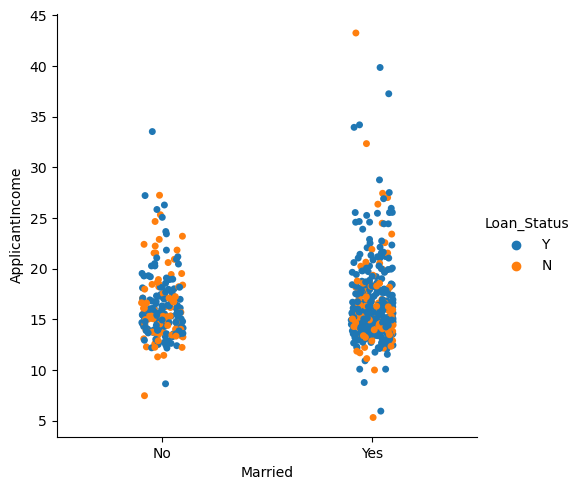

In [18]:
#checking other columns to relationship with loan status

sns.catplot(x='Married',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.show()

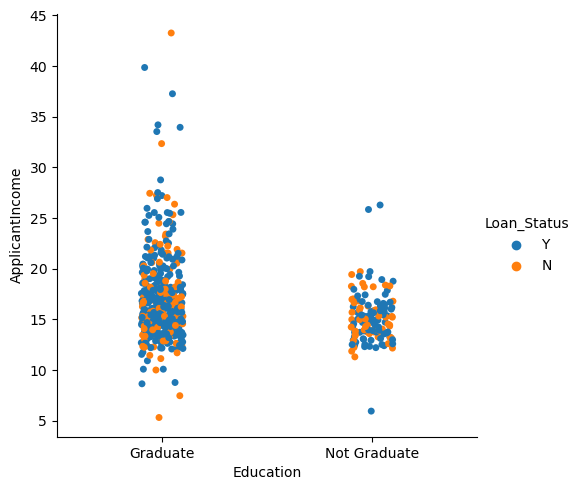

In [19]:
sns.catplot(x='Education',y='ApplicantIncome',data=data,hue='Loan_Status')
plt.show()

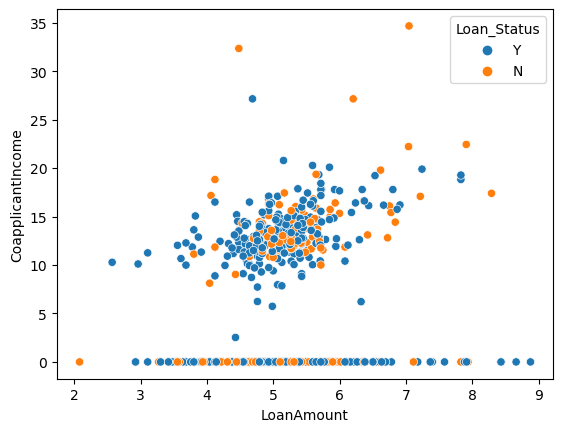

In [20]:
sns.scatterplot(x='LoanAmount',y='CoapplicantIncome',data=data,hue='Loan_Status')
plt.show()

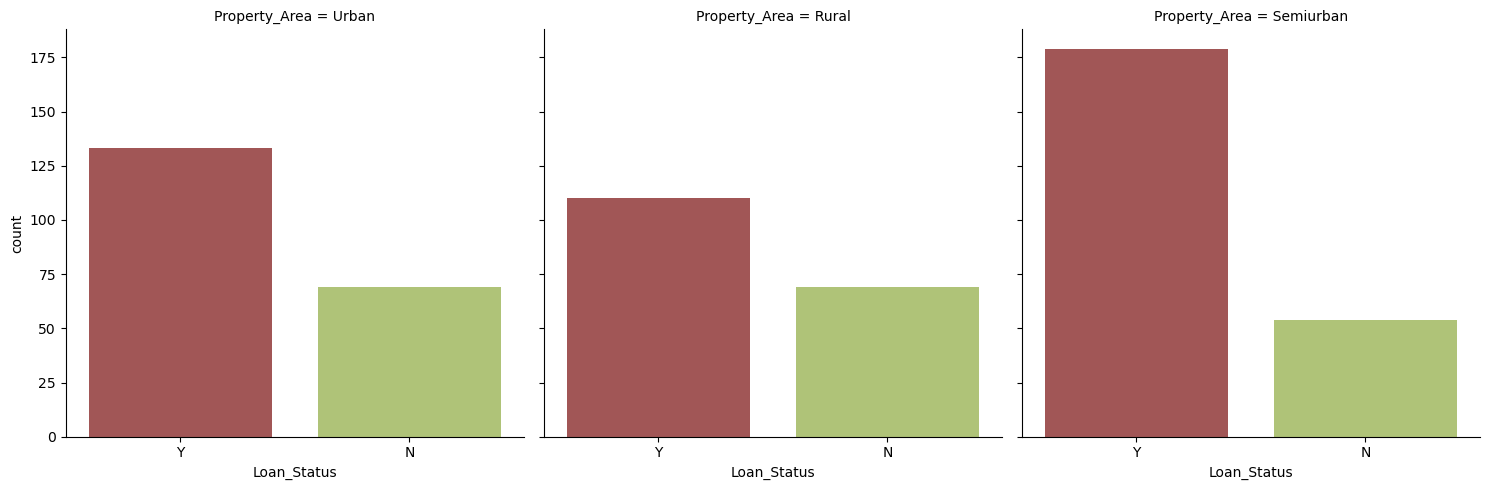

In [26]:
sns.catplot(x= 'Loan_Status', col= 'Property_Area', data=data, palette= 'tab20b_r', kind='count')
plt.show()

we see that more chances to taken loan is occer in suburban areas hence these are more contribute to loan sitation

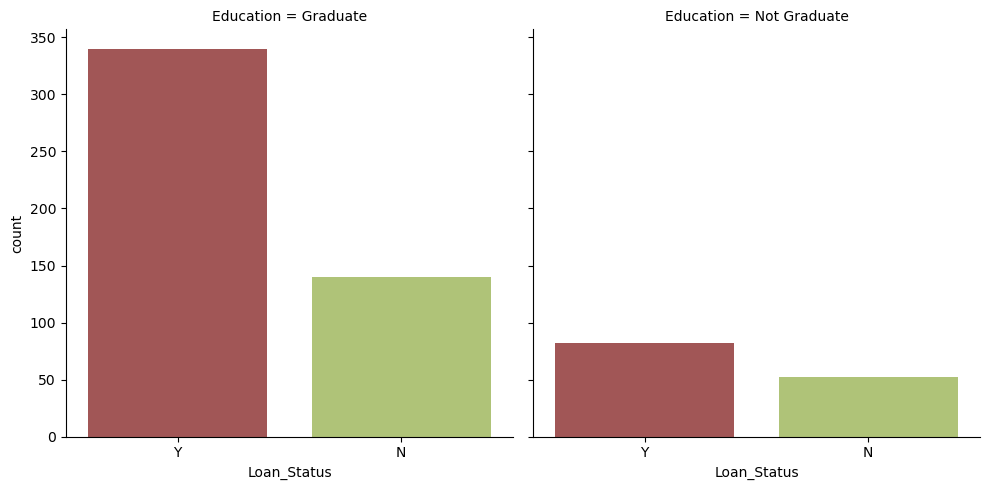

In [28]:
sns.catplot(x= 'Loan_Status', col= 'Education', data=data, palette= 'tab20b_r', kind='count')
plt.show()

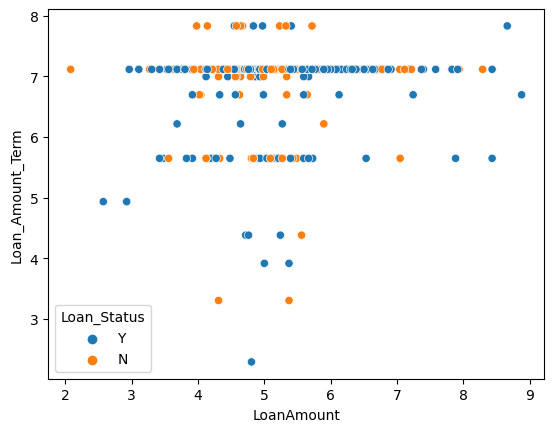

In [29]:
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',data=data,hue='Loan_Status')
plt.show()

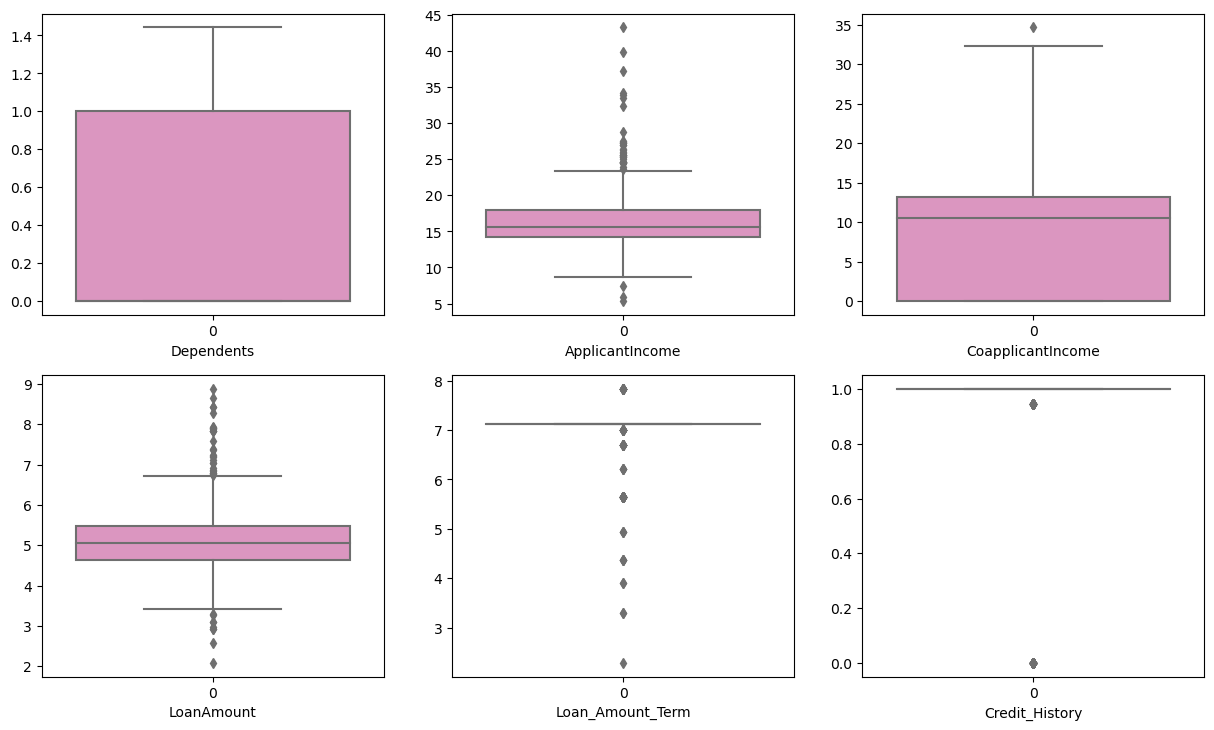

In [31]:
#lets check outlier by plot boxplot
plt.figure(figsize=(15,18))
p=1
for i in numerical_col:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(data[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

we see that lot ofoulier present in columns so we remove this and improve the performance of the models

In [14]:
data['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

In [15]:
from scipy.stats import zscore

out_features = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z= np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.380325,1.053225,0.169528,0.281947,0.451640
1,0.022870,0.561256,0.100752,0.281947,0.451640
2,0.533028,1.053225,1.269462,0.281947,0.451640
3,0.711341,0.820678,0.226303,0.281947,0.451640
4,0.419383,1.053225,0.092554,0.281947,0.451640
...,...,...,...,...,...
609,0.574203,1.053225,1.152903,0.281947,0.451640
610,0.128936,1.053225,1.996700,2.235999,0.451640
611,0.899211,0.178302,1.403404,0.281947,0.451640
612,0.794146,1.053225,0.693799,0.281947,0.451640


In [16]:
#threshold=3
np.where(z>3)

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
        242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
        523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64),
 array([3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0, 0, 3, 3, 2, 3, 0, 2, 2, 0, 0,
        2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2], dtype=int64))

In [17]:
# now removing data above zscore and creating new dataframe
data1 = data[(z<3).all(axis=1)]
data1.shape

(582, 12)

In [18]:
data1.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.110862,0.004801,0.130538,-0.094369,-0.034240
ApplicantIncome,0.110862,1.000000,-0.347312,0.468413,-0.051720,0.046255
CoapplicantIncome,0.004801,-0.347312,1.000000,0.207530,-0.010833,0.000486
LoanAmount,0.130538,0.468413,0.207530,1.000000,0.061735,0.007162
Loan_Amount_Term,-0.094369,-0.051720,-0.010833,0.061735,1.000000,0.036194
Credit_History,-0.034240,0.046255,0.000486,0.007162,0.036194,1.000000


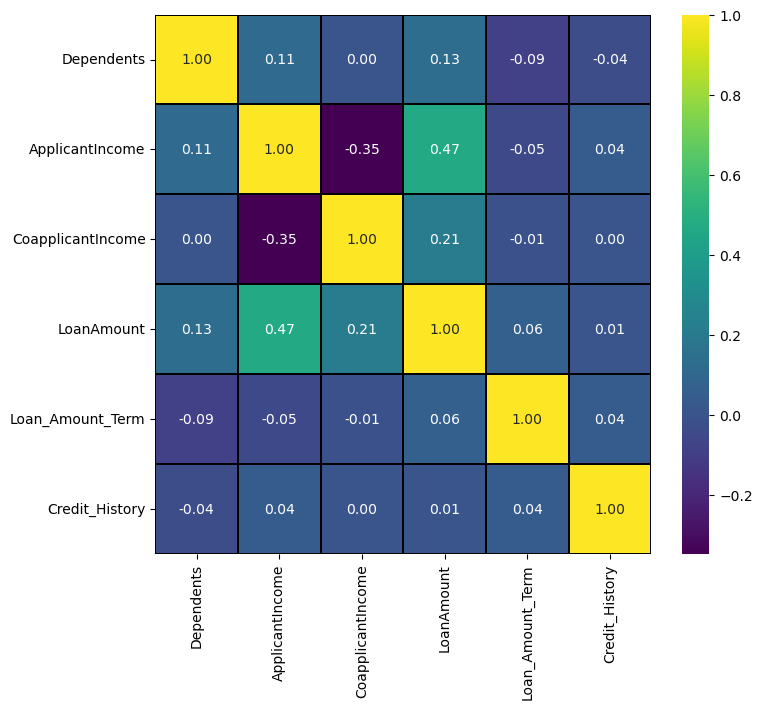

In [40]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(8,7))
sns.heatmap(data1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'viridis')
plt.show()

through this we see the all columns are postively and negatively correlated to each other and good relation but not perfect with target variables hence we good to go with this columns to build model

In [19]:
data1.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
# lets encode categorical columne by using one hot encoder to encode our data
encode = pd.get_dummies(data1[['Gender','Married','Self_Employed','Education','Property_Area']],drop_first=True)
encode

,Gender_Male,Married_Yes,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,1
1,1,1,0,0,0,0
2,1,1,1,0,0,1
3,1,1,0,1,0,1
4,1,0,0,0,0,1
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,0,0,0,0
611,1,1,0,0,0,1
612,1,1,0,0,0,1


In [21]:
data2=pd.concat([data1,encode],axis=1)
data2.shape

(582, 18)

In [22]:
#after encode we have remove the columns which have to be encoded
data2.drop(['Gender','Married','Self_Employed','Education','Property_Area'],axis=1,inplace=True)
data2.shape


(582, 13)

In [38]:
data2.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.504085,16.183871,7.486850,5.070900,7.009893,0.840033,0.817869,0.651203,0.128866,0.225086,0.379725,0.324742
std,0.592754,3.093631,6.900496,0.711405,0.403829,0.352584,0.386284,0.477000,0.335340,0.417998,0.485736,0.468681
min,0.000000,5.313293,0.000000,2.962496,5.646216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.149753,0.000000,4.641589,7.113787,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.536163,10.793670,5.039684,7.113787,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17.823896,13.141912,5.428835,7.113787,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.442250,27.442635,27.144176,7.582787,7.829735,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# to  conver our target values tonumerical form
data2['Loan_Status']= data2['Loan_Status'].map({'Y':1,'N':0})

In [24]:
# lets seperate the features and target variables
x = data2.drop('Loan_Status',axis=1)
y = data2['Loan_Status']

print(x.shape)
print(y.shape)

(582, 12)
(582,)


In [25]:
# lets standerdized our data by using standerd scaler to scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()



,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0.0,18.017473,0.000000,5.270588,7.113787,1.0,1,0,0,0,0,1
1,1.0,16.610522,11.467457,5.039684,7.113787,1.0,1,1,0,0,0,0
2,0.0,14.422496,0.000000,4.041240,7.113787,1.0,1,1,1,0,0,1
3,0.0,13.720654,13.310098,4.932424,7.113787,1.0,1,1,0,1,0,1
4,0.0,18.171206,0.000000,5.204828,7.113787,1.0,1,0,0,0,0,1


we have scaled the data by standered scaler method to overcome the issue of biasness

In [26]:
# now initialize model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs)

best accuracy is 0.88 at random state 184


In [28]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 184)

In [30]:
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
predgbt = gbt.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predgbt))
print('confusion matrix :\n',confusion_matrix(y_test,predgbt))
print('classification report :\n',classification_report(y_test,predgbt))

accracy_score :
 0.8228571428571428
confusion matrix :
 [[ 26  19]
 [ 12 118]]
classification report :
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        45
           1       0.86      0.91      0.88       130

    accuracy                           0.82       175
   macro avg       0.77      0.74      0.76       175
weighted avg       0.82      0.82      0.82       175



In [31]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8342857142857143
[[ 28  17]
 [ 12 118]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        45
           1       0.87      0.91      0.89       130

    accuracy                           0.83       175
   macro avg       0.79      0.76      0.77       175
weighted avg       0.83      0.83      0.83       175



In [32]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predknn))
print('confusion matrix :\n',confusion_matrix(y_test,predknn))
print('classification report :\n',classification_report(y_test,predknn))

accracy_score :
 0.7542857142857143
confusion matrix :
 [[ 15  30]
 [ 13 117]]
classification report :
               precision    recall  f1-score   support

           0       0.54      0.33      0.41        45
           1       0.80      0.90      0.84       130

    accuracy                           0.75       175
   macro avg       0.67      0.62      0.63       175
weighted avg       0.73      0.75      0.73       175



In [33]:
dtm = DecisionTreeClassifier()
dtm.fit(x_train,y_train)
preddtm= dtm.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,preddtm))
print('confusion matrix :\n',confusion_matrix(y_test,preddtm))
print('classification report :\n',classification_report(y_test,preddtm))

accracy_score :
 0.7485714285714286
confusion matrix :
 [[ 30  15]
 [ 29 101]]
classification report :
               precision    recall  f1-score   support

           0       0.51      0.67      0.58        45
           1       0.87      0.78      0.82       130

    accuracy                           0.75       175
   macro avg       0.69      0.72      0.70       175
weighted avg       0.78      0.75      0.76       175



wesee that accuracy score is 88 percent in logistic regression model which is hiher than other model

In [34]:
#lets checking crooss validation across models

score= cross_val_score(gbt,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.76068376 0.75213675 0.76724138 0.78448276 0.81896552]
mean : 0.7767020335985853


In [35]:
score= cross_val_score(lr,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.81196581 0.78632479 0.78448276 0.85344828 0.82758621]
mean : 0.8127615679339817


In [36]:
score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.79487179 0.77777778 0.77586207 0.80172414 0.81896552]
mean : 0.7938402593575007


In [37]:
score= cross_val_score(dtm,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.75213675 0.67521368 0.74137931 0.75862069 0.73275862]
mean : 0.7320218096080165


In [38]:
score= cross_val_score(knn,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.72649573 0.69230769 0.68103448 0.63793103 0.68103448]
mean : 0.6837606837606838


we see that after cross validation check we have gain hiher accracy in logistic regression  model hence proceedwith this model and create hyperperameter tuning on this to achive more accracy